ЛАБОРАТОРНА РОБОТА н6

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

model.fit(
  train_images,
  to_categorical(train_labels),
  verbose=2,
  epochs=5,
  batch_size=32,
)

model.evaluate(
  test_images,
  to_categorical(test_labels)
)


model.save_weights('model.h5')
# model.load_weights('model.h5')

c:\anacocok\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Epoch 1/5
1875/1875 - 4s - loss: 0.3564 - accuracy: 0.8927 - 4s/epoch - 2ms/step
Epoch 2/5
1875/1875 - 3s - loss: 0.1840 - accuracy: 0.9442 - 3s/epoch - 2ms/step
Epoch 3/5
1875/1875 - 3s - loss: 0.1455 - accuracy: 0.9556 - 3s/epoch - 2ms/step
Epoch 4/5
1875/1875 - 3s - loss: 0.1212 - accuracy: 0.9629 - 3s/epoch - 2ms/step
Epoch 5/5
1875/1875 - 4s - loss: 0.1047 - accuracy: 0.9682 - 4s/epoch - 2ms/step
313/313 [==============================] - 1s 2ms/step - loss: 0.1263 - accuracy: 0.9600


1/1 [==============================] - 0s 22ms/step


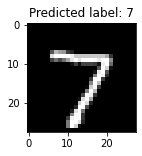

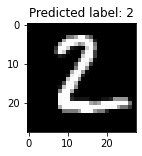

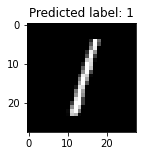

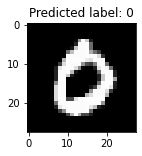

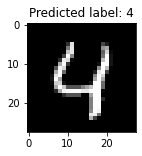

In [3]:
import matplotlib.pyplot as plt

predictions = model.predict(test_images[:5])

predicted_labels = np.argmax(predictions, axis=1)

for i in range(5):
    plt.figure(figsize=(2,2))
    plt.imshow(test_images[i].reshape(28,28), cmap='gray')
    plt.title(f"Predicted label: {predicted_labels[i]}")
    plt.show()
